Лабораторная работа по теме Кластерный анализ
Выполнил студент 1 курса магистратуры Аналитака данных группа S4101

In [812]:
# Первым делом импортируем необходимые библиотеки и настроим отображение
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

matplotlib.style.use('ggplot')
%matplotlib inline

pd.set_option("future.no_silent_downcasting", True)

sns.set_theme()

In [928]:
# Назначим папку рабочей директории проекта
os.chdir("E:\\ИТМО\\Магистратура\\01 Семестр\\Анализ данных на Python\\Задачи для лабораторной 1-3\\задача_3_цифры")

In [930]:
# Импортируем данные из файла используя разделитель ';' и отобразим первые записи
df = pd.read_table('digit.dat', sep=";")
df.head()

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


In [932]:
# При помощи фильтра и регулярного выражения уберём дублирующие колонки данных
df = df.filter(regex="[A-H]$")
df

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [756]:
# Посмотрим описание данных
df.describe()

,A,B,C,D,E,F,G,H
count,500,500,500,500,500,500,500,500
unique,10,2,2,2,2,2,2,2
top,eight,ONE,ONE,ONE,ONE,ZERO,ONE,ONE
freq,58,375,299,363,363,290,416,334


In [757]:
# Выведем уникальные значения записей по колонке 'A' по ним видно, что присутсвуют пробелы в строках
df['A'].unique()

array(['seven', 'one  ', 'four ', 'two  ', 'eight', 'five ', 'six  ',
       'zero ', 'nine ', 'three'], dtype=object)

In [758]:
# Выведем уникальные значения записей по колонке 'B' по ним видно, что присутсвуют пробелы в строках
df['B'].unique()

array(['ONE ', 'ZERO'], dtype=object)

In [759]:
# При помощи метода map и lambda функции уберем пробелы и переведём в нижний регистр по всему дата сету для более удобной дальнейшей обработки
df = df.map(lambda x: x.lower().strip() if isinstance(x, str) else x)

In [760]:
# Проверяем результат и видем что пробелов нет
df['A'].unique()

array(['seven', 'one', 'four', 'two', 'eight', 'five', 'six', 'zero',
       'nine', 'three'], dtype=object)

In [761]:
# Проверяем результат и видем что пробелов нет и значения в нижнем регистре
df['B'].unique()

array(['one', 'zero'], dtype=object)

In [762]:
# При помощи словаря и метода replace заменяем значения в дата сете на числовые и выводим результат
df = df.replace({'one': 1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight': 8, 'nine':9, 'zero':0})
df

,A,B,C,D,E,F,G,H
0,7,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,4,0,1,1,1,0,1,0
3,2,1,1,1,1,1,0,0
4,8,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
495,5,1,1,0,1,0,1,1
496,7,1,0,1,1,1,1,0
497,4,0,0,1,1,1,0,0
498,0,1,1,1,0,0,1,0


In [763]:
# Сгруппируем данные по группирующей переменной и выведем среднее значение для каждого элемента цифры, 
# по этим данным можем оценить точноcть сканирования.
df.groupby('A').mean()

,B,C,D,E,F,G,H
A,,,,,,,
0,0.904762,0.857143,0.97619,0.119048,0.904762,0.928571,0.880952
1,0.093023,0.069767,0.930233,0.093023,0.209302,0.883721,0.162791
2,0.883721,0.093023,0.813953,0.930233,0.883721,0.023256,0.930233
3,0.909091,0.145455,0.909091,0.927273,0.145455,0.945455,0.854545
4,0.076923,0.865385,0.884615,0.980769,0.153846,0.884615,0.115385
5,0.907407,0.981481,0.148148,0.981481,0.111111,0.925926,0.888889
6,0.9,0.88,0.02,0.88,0.94,0.9,0.88
7,0.875,0.145833,0.875,0.125,0.083333,0.916667,0.083333
8,0.913793,0.948276,0.896552,0.965517,0.827586,0.87931,0.87931


In [764]:
# Линии соответствуют черточкам на экране калькулятора
# B - top horizontal, 
# C - upper left vertical, 
# D - upper right vertical, 
# E - middle horizontal, 
# F - lower left vertical, 
# G - lower right vertical, 
# H - bottom horizontal.

In [765]:
# Напишем функцию для визуализации результата
def digit_visualization(df_mean):
    height = 9
    width = 5
    horizontal = ["h" + str(i) for i in range(width)] * height
    vertical = ["v" + str(i) for i in range(height) for j in range(width)]
    for dig in range(len(df_mean)):
        b = df_mean.iloc[dig]["B"]
        c = df_mean.iloc[dig]["C"]
        d = df_mean.iloc[dig]["D"]
        e = df_mean.iloc[dig]["E"]
        f = df_mean.iloc[dig]["F"]
        g = df_mean.iloc[dig]["G"]
        h = df_mean.iloc[dig]["H"]
        value = (
            [0, b, b, b, 0]
            + [c, 0, 0, 0, d] * 3
            + [0, e, e, e, 0]
            + [f, 0, 0, 0, g] * 3
            + [0, h, h, h, 0]
        )
        digit = pd.DataFrame(
            {
                "h": horizontal,
                "v": vertical,
                "value": value,
            }
        )
        led_digit = digit.pivot(index="v", columns="h", values="value")

        f, ax = plt.subplots(figsize=(2, 3))
        sns.heatmap(led_digit, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=False, yticklabels=False)

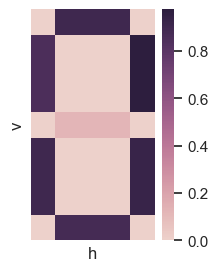

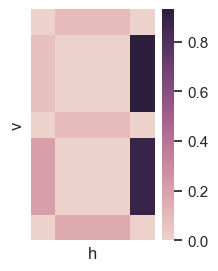

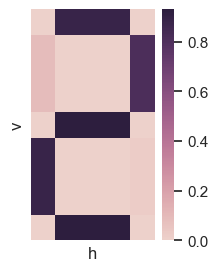

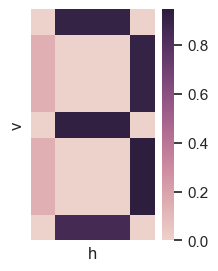

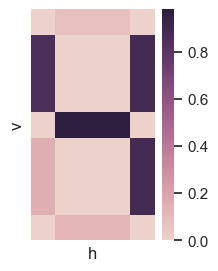

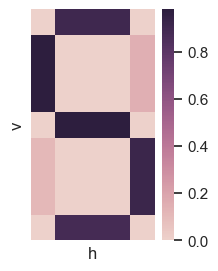

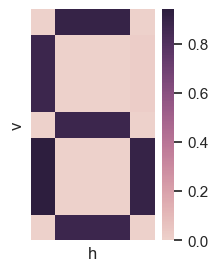

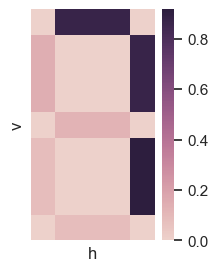

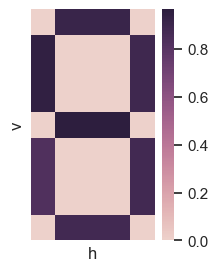

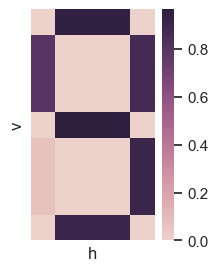

In [766]:
# Визуализируем результат при помощи тепловой карты, чем интенсивнее цвет - тем выше среднее значение распознования
digit_visualization(df.groupby('A').mean())

In [767]:
# Убираем группирующую переменную 'A' из данных для выполнения кластеризации по условию задачи
df_clear = df.drop(columns=['A'],axis = 1)
df_clear

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
495,1,1,0,1,0,1,1
496,1,0,1,1,1,1,0
497,0,0,1,1,1,0,0
498,1,1,1,0,0,1,0


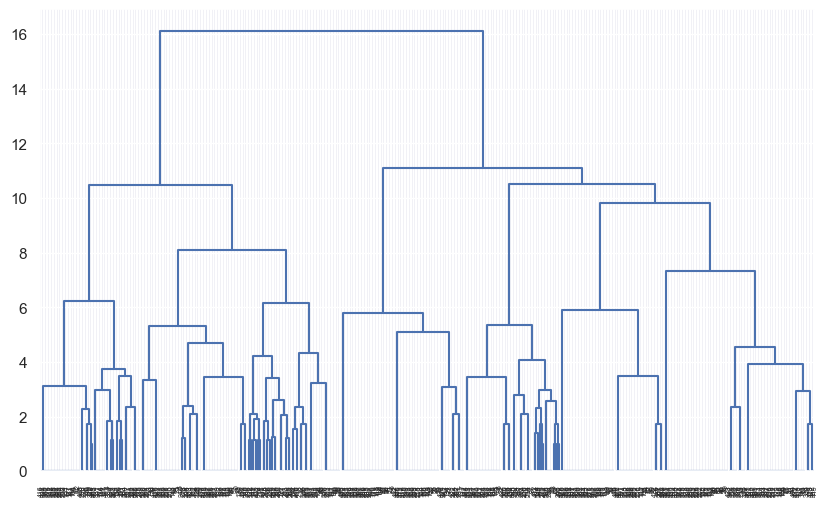

In [768]:
# Для проведения иерархического кластерного анлиза используем команду linkage из библиотеки scipy
# используем метод Варда и Эвклидово расстояние
# Пороговое значение определяется убого, по формуле h = 0.7*max(link[:,2]) - это не подходит подходит
# сразу строим дендрограмму одним цветом для проведения анализа 
link = linkage(df_clear, 'ward', 'euclidean')
fig = plt.figure(figsize=(10,6))
# строим дендрограмму
dn = dendrogram(link, color_threshold=-1, labels=df_clear.index.tolist())

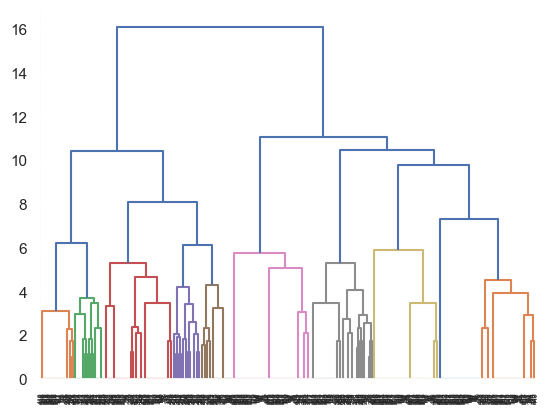

In [769]:
# Определяем число кластеров по пороговому значению
# Подбирая значение растояния dist можно выбрать наилучний результат, 
# изначально выбирается то значение где увеличение растояния увеличивается резко
dist = 6
dn = dendrogram(link, color_threshold=dist, labels=df_clear.index.tolist())

In [770]:
#Остонавливаем объединение когда расстояние между кластерами привысит значение dist
df['link_cluster'] = fcluster(link, dist, criterion='distance')
# Сгруппируем данные по кластеру и выведем среднее значение для каждого элемента цифры, 
# по этим данным можем оценить точноcть кластеризации.
df.groupby('link_cluster').mean()

,A,B,C,D,E,F,G,H
link_cluster,,,,,,,,
1,3.705882,0.029412,0.852941,1.0,1.0,0.0,0.852941,0.0
2,5.129032,0.0,0.967742,0.548387,0.903226,0.548387,0.967742,0.806452
3,4.15942,0.507246,0.188406,1.0,0.0,0.115942,0.913043,0.057971
4,5.214286,0.785714,0.678571,0.0,0.428571,0.428571,0.964286,0.214286
5,5.125,1.0,0.53125,1.0,0.8125,0.34375,1.0,0.0
6,5.5375,1.0,0.8,0.0,1.0,0.475,0.95,1.0
7,3.704918,0.836066,0.344262,0.754098,0.983607,0.754098,0.0,0.885246
8,4.477612,1.0,0.955224,1.0,0.537313,1.0,0.910448,1.0
9,7.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0


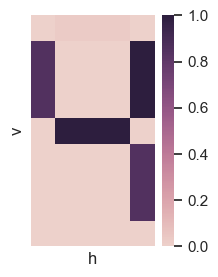

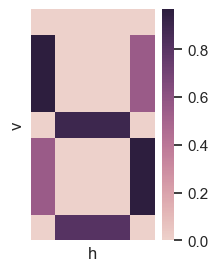

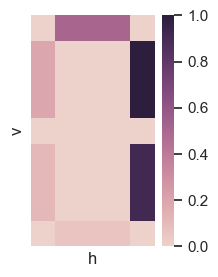

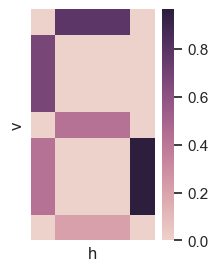

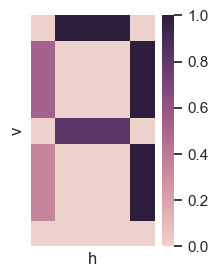

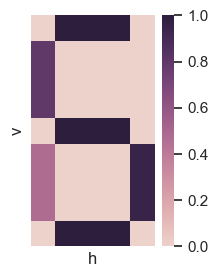

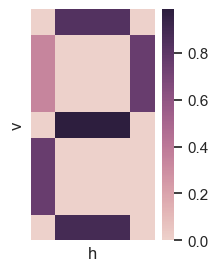

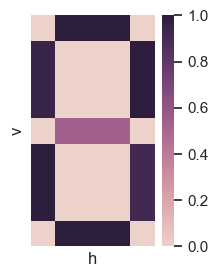

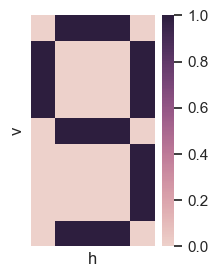

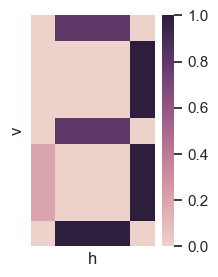

In [771]:
# Визуализируем результат при помощи библиотеки sseaborn

digit_visualization(df.groupby('link_cluster').mean())

In [772]:
# По результату визуализации видно что не все цифры были кластаризованы достоверным образом, некоторые непонятно что значат.

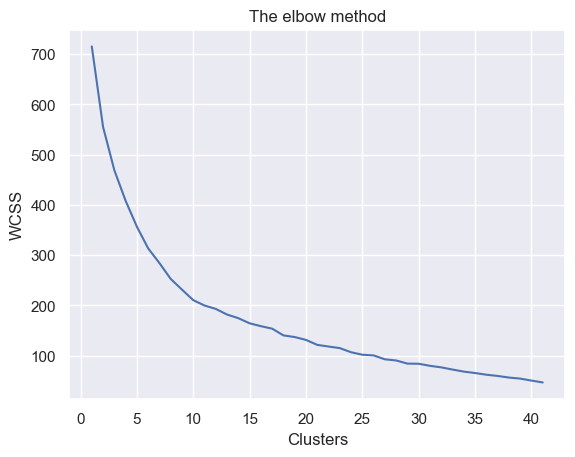

In [773]:
# Пременяем метод локтя(каменистой осыпи) для первоначальной оценки количества кластеров 
# по это сумме квадратов расстояний между каждой точкой и центроидом в кластере
# Используем кластеризацю методом K-средних 
centroid = 'k-means++'
wcss = []
range_ = (1, 42)


for i in range(*range_):
    kmeans = KMeans(
        n_clusters=i, init=centroid, max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(df_clear)
    wcss.append(kmeans.inertia_)

plt.plot(range(*range_), wcss)
plt.title('The elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [774]:
# Метод локтя не даёт ярко-выраженного изгиба и всё же можем отметить изгибы на 10 и 18 кластерах,
# проверим эти значения при помощи метода Силуэт
# в результате увидим что значение при 10-ти лучше чем при 18-ти его и будем использовать

range_n_clusters = [10, 18]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_clear)
    
    silhouette_avg = silhouette_score(df_clear, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 10 The average silhouette_score is : 0.4337621355951389
For n_clusters = 18 The average silhouette_score is : 0.5577950004677352


In [775]:
# Выполним кластеризацию методом К-средних на 10 кластеров и добавим полученные значения в датасет, выведем результат
kmeans = KMeans(
        n_clusters=10, init=centroid, max_iter=300, n_init=10, random_state=0
    )
kmeans.fit(df_clear)
df['KMeans'] = kmeans.labels_
df

,A,B,C,D,E,F,G,H,link_cluster,KMeans
0,7,1,0,1,0,0,1,0,3,1
1,1,0,0,1,0,0,1,0,3,7
2,4,0,1,1,1,0,1,0,1,5
3,2,1,1,1,1,1,0,0,7,4
4,8,0,1,1,1,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...
495,5,1,1,0,1,0,1,1,6,8
496,7,1,0,1,1,1,1,0,5,1
497,4,0,0,1,1,1,0,0,7,2
498,0,1,1,1,0,0,1,0,3,1


In [776]:
# Сгруппируем данные по кластеру и выведем среднее значение для каждого элемента цифры, 
# по этим данным можем оценить точноcть кластеризации.
df.groupby('KMeans').mean()

,A,B,C,D,E,F,G,H,link_cluster
KMeans,,,,,,,,,
0,5.885246,0.852459,0.918033,0.0,0.885246,1.0,0.852459,0.803279,5.245902
1,5.627451,1.0,0.098039,0.941176,0.27451,0.098039,0.921569,0.0,3.607843
2,2.358974,0.820513,0.0,0.846154,0.923077,1.0,0.0,0.897436,6.974359
3,7.135593,0.847458,1.0,1.0,0.932203,0.0,0.915254,1.0,7.474576
4,6.672727,0.945455,0.854545,1.0,1.0,1.0,0.909091,0.927273,7.709091
5,4.479167,0.229167,1.0,0.979167,0.916667,0.0625,0.916667,0.0,2.312500
6,4.309091,0.890909,0.0,0.818182,0.927273,0.0,0.872727,1.0,9.000000
7,2.088889,0.0,0.0,0.866667,0.155556,0.222222,0.888889,0.133333,3.777778
8,5.3,0.88,1.0,0.0,0.94,0.0,0.96,0.9,5.280000


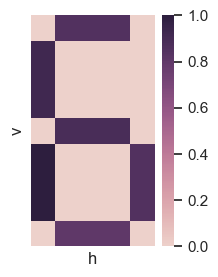

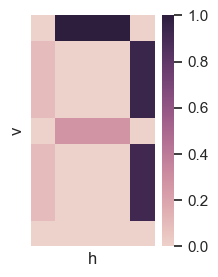

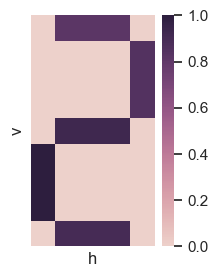

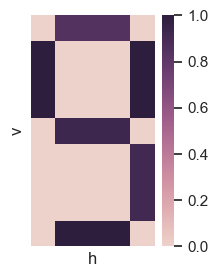

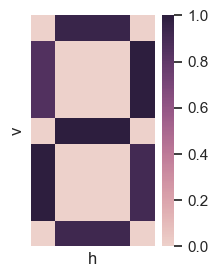

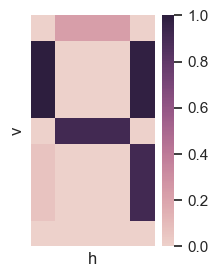

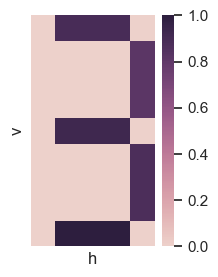

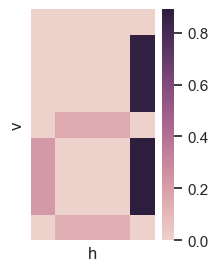

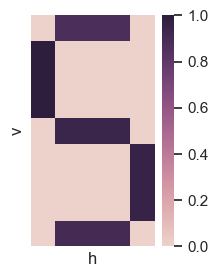

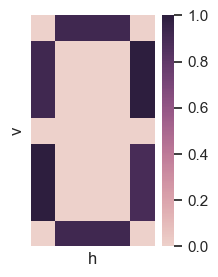

In [777]:
# Визуализируем результат при помощи библиотеки sseaborn используем созданную ранее функцию

digit_visualization(df.groupby('KMeans').mean())

In [778]:
# Видно, что результат кластеризации лучше чем иерархический кластерный анлиз, все цифры распознаны.

In [924]:
# Выполним кластеризацию методом DBSCAN и добавим полученные значения в датасет, 
# выведем результат по полученным кластерам
dbscan = DBSCAN(eps=0.9, min_samples=12, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
# меняя значение eps и min_samples настраиваем кол-во кластеров при уменьшени eps или min_samples увеличивается при увеличении уменьшается,
# при увеличении eps или min_samples - уменьшается, я попробовал разные варианты и остановился на этом
dbscan.fit(df_clear)
table_ = pd.Series(dbscan.labels_).value_counts()
table_.sort_index(inplace=True)
table_

-1    210
 0     24
 1     18
 2     26
 3     35
 4     24
 5     42
 6     36
 7     29
 8     25
 9     31
Name: count, dtype: int64

In [926]:
# Сгруппируем данные по кластеру и выведем среднее значение для каждого элемента цифры, 
# по этим данным можем оценить точноcть кластеризации.
df.groupby('dbscan').mean()

,A,B,C,D,E,F,G,H,link_cluster,KMeans
dbscan,,,,,,,,,,
-1,4.409524,0.614286,0.504762,0.652381,0.666667,0.457143,0.714286,0.533333,5.12381,4.071429
0,6.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.00000,1.000000
1,1.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.00000,7.000000
2,3.884615,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.00000,5.000000
3,5.4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.00000,8.000000
4,2.208333,1.0,0.0,1.0,1.0,1.0,0.0,1.0,7.00000,2.000000
5,7.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,9.00000,3.000000
6,7.444444,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.00000,4.000000
7,5.931034,1.0,1.0,0.0,1.0,1.0,1.0,1.0,6.00000,0.000000


In [896]:
# Добавим полученные значения в датасет, выведем результат
df['dbscan'] = dbscan.labels_

In [900]:
#Сравним результаты с помощью таблицы сопряженности с результатом другой кластеризации
tab = pd.crosstab(df['dbscan'], df['KMeans'])
tab

KMeans,0,1,2,3,4,5,6,7,8,9
dbscan,,,,,,,,,,
-1,32,27,15,17,19,22,24,27,15,12
0,0,24,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,18,0,0
2,0,0,0,0,0,26,0,0,0,0
3,0,0,0,0,0,0,0,0,35,0
4,0,0,24,0,0,0,0,0,0,0
5,0,0,0,42,0,0,0,0,0,0
6,0,0,0,0,36,0,0,0,0,0
7,29,0,0,0,0,0,0,0,0,0


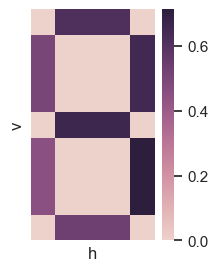

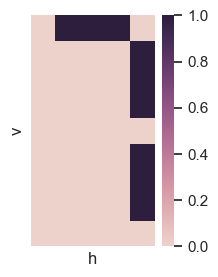

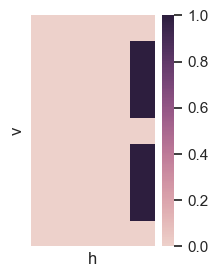

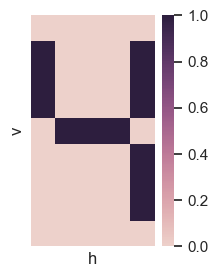

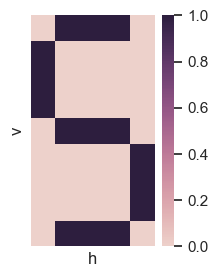

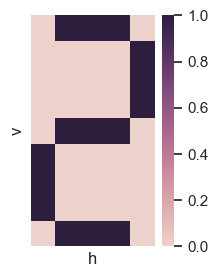

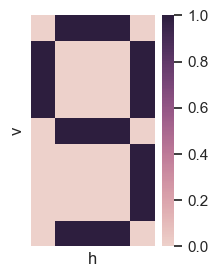

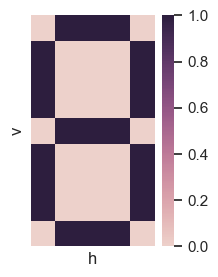

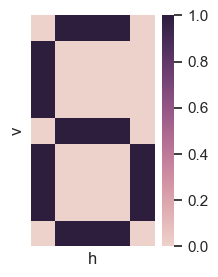

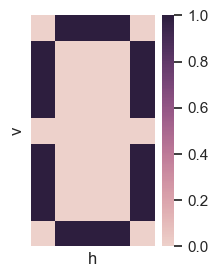

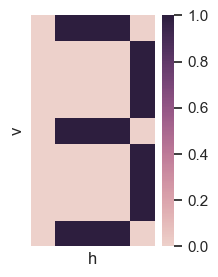

In [902]:
# Визуализируем результат при помощи библиотеки sseaborn используем созданную ранее функцию
digit_visualization(df.groupby('dbscan').mean())

In [824]:
# Вывод если сравнить результаты на мой взгляд для данного набора данных больше подходит метод K-средних
# он позволяет явно оценить кол-во кластеров, так же мне понравился результат DBSCAN 
# тем что шумы были расположены в отдельный кластер это хорошо в ситуации когда нужно точное определение

In [ ]:
# Мой гитхаб https://github.com/0z0nize